In [28]:
import pandas as pd
import matplotlib.pyplot as plt

In [29]:

file_path = 'netflix_titles.csv'
df = pd.read_csv(file_path)

In [30]:
df.shape

(8807, 12)

In [31]:
df.drop_duplicates(inplace=True)

In [32]:
df.shape

(8807, 12)

In [33]:
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')

In [34]:
df['duration'] = df['duration'].fillna('0 min')

In [35]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [36]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month


In [37]:
def parse_duration(duration):
    if 'Season' in duration:
        return int(duration.split(' ')[0]) * 60 
    else:
        return int(duration.split(' ')[0])

df['duration_minutes'] = df['duration'].apply(parse_duration)

In [38]:
df.drop(columns=['duration'], inplace=True)


In [39]:
df.rename(columns={
    'show_id': 'Show ID',
    'type': 'Type',
    'title': 'Title',
    'director': 'Director',
    'cast': 'Cast',
    'country': 'Country',
    'date_added': 'Date Added',
    'release_year': 'Release Year',
    'rating': 'Rating',
    'listed_in': 'Listed In',
    'description': 'Description',
    'year_added': 'Year Added',
    'month_added': 'Month Added',
    'duration_minutes': 'Duration (Minutes)'
}, inplace=True)


In [40]:
cleaned_file_path = 'netflix_titles_cleaned.csv'
df.to_csv(cleaned_file_path, index=False)




In [41]:
import numpy as np
pais = df['Country'].drop_duplicates()
#print(pais).unique()


In [42]:
#df.head()


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Show ID             8807 non-null   object        
 1   Type                8807 non-null   object        
 2   Title               8807 non-null   object        
 3   Director            8807 non-null   object        
 4   Cast                8807 non-null   object        
 5   Country             8807 non-null   object        
 6   Date Added          8709 non-null   datetime64[ns]
 7   Release Year        8807 non-null   int64         
 8   Rating              8803 non-null   object        
 9   Listed In           8807 non-null   object        
 10  Description         8807 non-null   object        
 11  Year Added          8709 non-null   float64       
 12  Month Added         8709 non-null   float64       
 13  Duration (Minutes)  8807 non-null   int64       

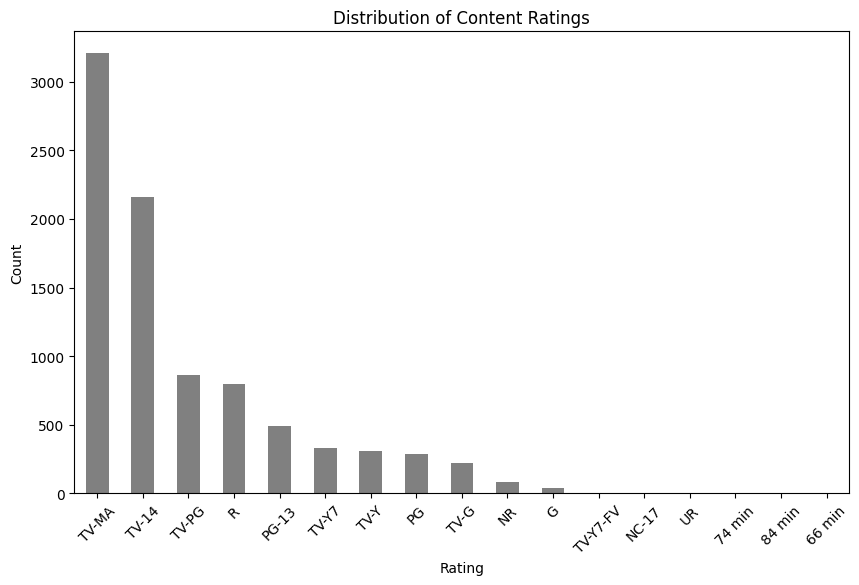

In [61]:
plt.figure(figsize=(10, 6))
df['Rating'].value_counts().plot(kind='bar', color='grey')
plt.title('Distribution of Content Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



### Insights

The examination of content ratings indicates an emphasis in ratings like TV-MA, this suggests a strategic emphasis on mature content. To expand its audience, the platform might consider diversify its content ratings to expand to a broader audiences. This observation underscores the significance of aligning content strategies with audience preferences to maximize market reach and viewer engagement.
<br/><br/>
<br/><br/>





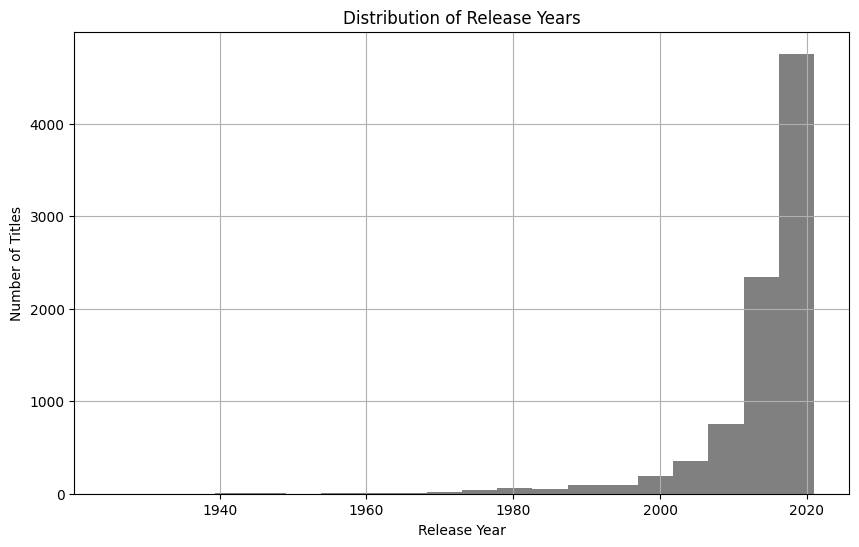

In [76]:
plt.figure(figsize=(10, 6))
df['Release Year'].hist(bins=20, color='grey')
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.show()


### Insights

The distribution of release years shows a rise in content creation in the latest years. This surge indicates an estrategic expansion to the increasing audience needs and take advantage of market prospects.
<br/><br/>
<br/><br/>


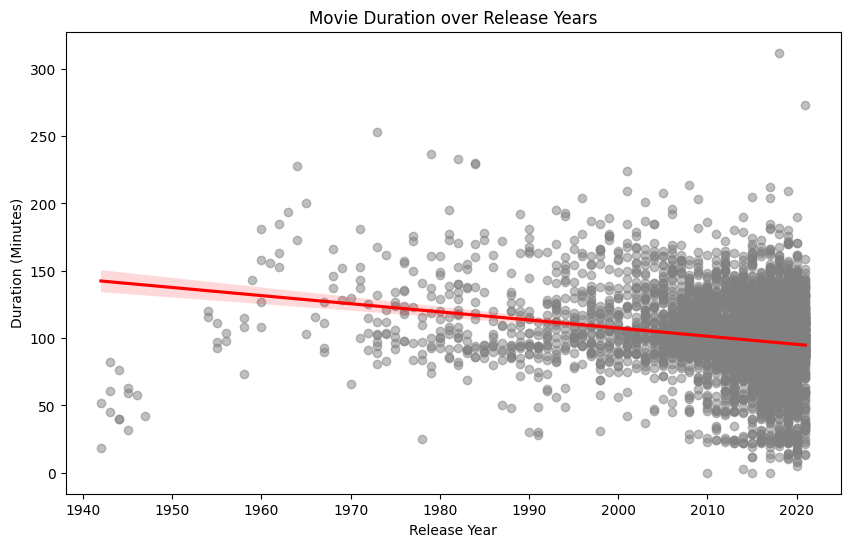

(-0.20581306442973993, 1.227196108418231e-59)

In [79]:
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation and P-value 
correlation, p_value = stats.pearsonr(movies['Release Year'], movies['Duration (Minutes)'])

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Release Year', y='Duration (Minutes)', data=movies, scatter_kws={'alpha':0.5, 'color':'grey'}, line_kws={"color": "red"})
plt.title('Movie Duration over Release Years')
plt.xlabel('Release Year')
plt.ylabel('Duration (Minutes)')
plt.show()


correlation, p_value


### Insights

The scatter plot, with a regression line suggests that there is a relationship between the year a movie was released and its duration as indicated by the correlation coefficient and p value. It seems that movies have been getting slightly shorter over time in recent years. This might be due to evolving audience preferences for content or adjustments to new ways of consuming media.
<br/><br/>
<br/><br/>

<Figure size 1200x800 with 0 Axes>

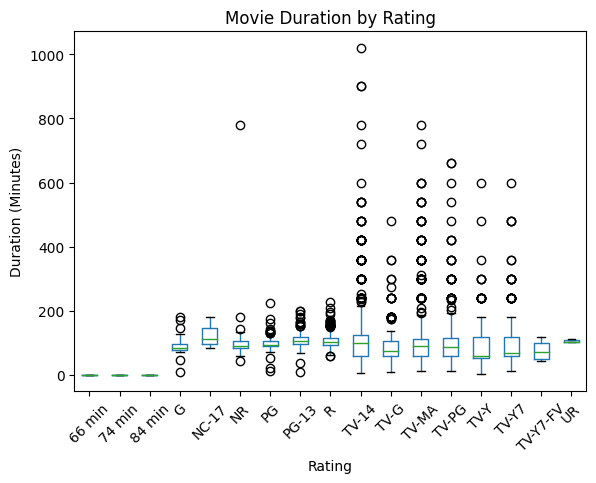

In [80]:
plt.figure(figsize=(12, 8))
df.boxplot(column='Duration (Minutes)', by='Rating', grid=False, rot=45)
plt.title('Movie Duration by Rating')
plt.suptitle('')  # Removes the default title
plt.xlabel('Rating')
plt.ylabel('Duration (Minutes)')
plt.show()




### Insights

The box plot depicting movie lengths based on ratings shows that movies vary in duration across rating categories. It indicates that certain ratings, like "R" or "TV MA" have a range of durations whereas others such as "G" or "PG" usually have consistent and shorter lengths. This implies that movies with age restrictions may delve into intricate or diverse themes leading to greater variability in their duration.

Understanding this information is important, for content planning as it suggests that the rating not influences the content but also impacts the expected length of the movie helping to ensure production aligns with audience expectations.
<br/><br/>
<br/><br/>


## Conclusions

In summary the analysis brings out trends and strategic insights, for creating content. The focus on ratings such as TV-MA indicates an approach but expanding into different areas could attract a wider audience. The recent increase in creation shows a stance in meeting the increasing demands of viewers and seizing market opportunities. The slight decrease in movie lengths over time suggests changing preferences, likely influenced by shifts in how media's consumed. Moreover the variation in movie durations based on ratings highlights the significance of matching content length with audience expectations for age restricted genres. These findings are essential, for shaping content strategies.

